In [1]:
# libraries

import pandas as pd
import os
import shutil
import re
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pydot import graphviz_layout

# Dataset and Data Wrangling:

### 1. Definition of Dataset:
The dataset used in this project consists of Software Requirement Specifications (SRS) that detail the functionalities and capabilities of a software system. Each row in the dataset represents a single requirement, focusing on a specific capability or feature that the software should possess. The primary objective of this dataset is to provide a structured and comprehensive list of requirements that guide the development and functionality of the software.

### 2. Data Cleaning:
Data cleaning is a crucial step in preparing the dataset for further analysis and processing. The SRS datasets obtained initially contained a mix of relevant and irrelevant information, necessitating a thorough cleaning process to ensure that only the essential data is retained.





In [89]:
def move_files(file_list, source_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    for file_name in file_list:
        source_file_path = os.path.join(source_dir, file_name+".csv")
        dest_file_path = os.path.join(dest_dir, file_name+".csv")

        if os.path.exists(source_file_path):
            shutil.move(source_file_path, dest_file_path)
            print(f"Moved: {source_file_path} to {dest_file_path}")
        else:
            print(f"File not found: {source_file_path}")
            
source_directory = "../ECSER/ECSER_RE/Datasets/"
destination_directory = 'datasets/'
files_to_move = ['dronology', 'oappt','rds4', 'wasp']

In [9]:
# Load one of the dataset to build the system

df = pd.read_csv(r"..\ECSER\ECSER_RE\Datasets\rds12.csv")

# Display the first few rows of the dataset
df.head(2)

,RequirementText,IsFunctional,Functional Correctness,Performance Efficiency,Compatibility,Usability,Reliability,Security,Maintainability,Portability,Compliance,IsQuality
0,The DUAP System shall collect probe vehicle data.,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,The DUAP data elements shall include probe vehicle data fields corresponding to the SAE J2735 format as enumerated in APPENDIX C - SAE J2735 Probe Data Elements.,0,NaN,NaN,Conflict,NaN,NaN,NaN,NaN,NaN,1,1


#### 2.1. Initial Data Collection:
The initial datasets were collected from various sources, each containing multiple columns, some of which were not pertinent to the SRS text. These non-sense columns included metadata and other extraneous information that did not contribute to the understanding or extraction of software requirements.

#### 2.2. Restructuring and Storing Data:
To streamline the dataset, the following steps were undertaken:

- **Removing Unnecessary Columns:** The first step involved identifying and removing columns that did not contain relevant SRS information. This helped in reducing the dataset to only those columns that were essential for the analysis.
  
- **Standardizing Texts:** The remaining SRS texts were then standardized to ensure consistency across the dataset. This involved converting all text to a uniform case (e.g., all lowercase) and ensuring that similar terms and phrases were represented consistently.

- **Removing Unnecessary Characters:** Using regular expressions (regex), unnecessary characters such as special symbols, extra spaces, and punctuation marks that did not contribute to the meaning of the requirements were removed. This step was crucial in ensuring that the text was clean and ready for further processing.

- **Saving the Cleaned Data:** After cleaning, the restructured and standardized data was saved in a new format, typically a CSV or a similar structured file, to facilitate easy access and further analysis. This cleaned dataset now contained only the relevant SRS text, making it ready for subsequent steps such as information extraction and workflow graph generation.

By meticulously cleaning and restructuring the dataset, we ensured that the data was in an optimal state for the next phases of the project, thereby enhancing the accuracy and efficiency of the information extraction and workflow graph generation processes.

In [135]:
# Some statements are not ending with fullstop.
# Fix this issue.
# There were bunch of them.

# all csv files
csv_files = [f for f in os.listdir('datasets') if f.endswith('.csv')]

# loop over each of them
for csv_file in csv_files:
    
    file_path = os.path.join('datasets', csv_file)
    
    df = pd.read_csv(file_path)["RequirementText"].dropna()
    
    idx = 0
    
    # fix, report and save if any of them not ending with fullstop.
    for i in df:
        
        if not i.endswith("."):
            df[idx] = i + "."
            print(f"{file_path} index {idx} updated")
        else:
            df[idx] = i    
        
        idx += 1
    
    df.to_csv(file_path)

In [130]:
def split_paragraph(paragraph):
    # Regular expression pattern to match a full stop followed by a space and a capital letter
    pattern = r'(?<=[.])\s*(?=[A-Z])'
    
    # split the paragraph based on the pattern
    sentences = re.split(pattern, paragraph)
    sentences = [i.strip() for i in sentences]
    
    return sentences

In [137]:
def requirements_text_prep(data):
    """
    Takes row file with requirement columns and split it smallest requirement statement.
    """
    # merge all reqs
    text = " ".join(data)
    # split to single statement
    text_lst = split_paragraph(text)
    # remove leading and trailing whitespaces
    text_lst = [i.strip() for i in text_lst]

    return pd.DataFrame(text_lst, columns=["RequirementText"])

In [138]:
# process all files to get a statement for each requirements.

csv_files = [f for f in os.listdir('datasets') if f.endswith('.csv')]

# loop over each of them
for csv_file in csv_files:
    
    file_path = os.path.join('datasets', csv_file)
    df = pd.read_csv(file_path)["RequirementText"].dropna()
    
    df = requirements_text_prep(df)
    
    df.to_csv(file_path)
    

In [92]:
# I only need Requirement text column. 
# Just in case, I will keep Isfunctional columns as well
# At the end of this process all my files will have same data structure.

def process_csv_files(input_folder):
    # List all CSV files in the input folder
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]
    
    # Define the columns to keep
    columns_to_keep = ['RequirementText']
    
    for csv_file in csv_files:
        # Construct the full file path
        file_path = os.path.join(input_folder, csv_file)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Check if the required columns exist in the dataframe
        if not all(col in df.columns for col in columns_to_keep):
            raise ValueError(f"The file {csv_file} does not contain the required columns: {columns_to_keep}")
        
        # Keep only the specified columns
        df_filtered = requirements_text_prep(df[columns_to_keep[0]])
        
        
        # Save the modified dataframe back to a CSV file
        df_filtered.to_csv(file_path, index=False)
        
        print(f'Processed and saved {csv_file}')

        
input_folder = 'datasets'
process_csv_files(input_folder)

Processed and saved dronology.csv
Processed and saved leeds.csv
Processed and saved rds8.csv
Processed and saved wasp.csv


In [139]:
# Cleaning all files

def clean_requirement_text(text):
    """
    to clean up all unwanted characters.
    """
    # Define the allowed characters regex pattern (including whitespace)
    allowed_chars_pattern = r'[^a-zA-Z0-9",.""''%/:()\-\[\] ]'
    
    # Use regex to replace disallowed characters with an empty string
    cleaned_text = re.sub(allowed_chars_pattern, '', text)
    
    return cleaned_text

def clean_csv_files(input_folder):
    """to go thru entire cleaning steps for each csv files in my dataset directory.
    """
    
    # List all CSV files in the input folder
    csv_files = [f for f in os.listdir(input_folder) if f.endswith('.csv')]
    
    for csv_file in csv_files:
        # Construct the full file path
        file_path = os.path.join(input_folder, csv_file)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # drop all duplicate rows
        df.drop_duplicates(inplace=True)
        
        # Check if 'RequirementText' column exists in the dataframe
        if 'RequirementText' not in df.columns:
            raise ValueError(f"The file {csv_file} does not contain the 'RequirementText' column.")
        
        # Clean the 'RequirementText' column
        df['RequirementText'] = df['RequirementText'].apply(clean_requirement_text)
        
        # Save the modified dataframe back to a CSV file
        df.to_csv(file_path, index=False)
        
        print(f'Cleaned and saved {csv_file}')


input_folder = 'datasets'
clean_csv_files(input_folder)

Cleaned and saved dronology.csv
Cleaned and saved leeds.csv
Cleaned and saved rds8.csv
Cleaned and saved wasp.csv


In [34]:
# Load one of the dataset to build the system

df = pd.read_csv(r"datasets\wasp.csv")

# Display the first few rows of the dataset
df.head(5)

,RequirementText
0,There should be an application that provides f...
1,The WASP platform must provide services that m...
2,The WASP platform should provide services that...
3,The WASP platform must provide services that m...
4,The WASP platform must allow end-users to prov...


### 2.3. Exploring the Cleaned Data:
After the initial data cleaning steps, the dataset was further explored to understand its structure and content better. At this stage, the dataset was reduced to a single column named `RequirementText`, which contained the SRS statements for each project. This column was the focal point for all subsequent analysis and processing.

#### Project Requirements Data:
To gain insights into the dataset, the number of requirements for each project was examined. This step involved counting the rows in the `RequirementText` column for each project file. The results of this exploration are summarized below:

| Project Title   | Number of Requirements |
|-----------------|-------------------------|
| dronology.csv   | 97                      |
| leeds.csv       | 87                      |
| rds8.csv        | 291                     |
| wasp.csv        | 67                      |

This table highlights the variability in the number of requirements across different projects. Each project has a unique set of requirements, with the number of requirements ranging from 67 to 291. This variability is expected, as different software projects have varying scopes and complexities, which are reflected in the number of requirements specified.

By exploring the cleaned data, we were able to:

- **Understand the Scope of Each Project:** The number of requirements gives an indication of the project's scope and complexity. For instance, `rds8.csv` with 291 requirements likely represents a more complex and feature-rich project compared to `wasp.csv` with 67 requirements.
  
- **Prepare for Further Analysis:** Knowing the number of requirements per project helps in planning the subsequent steps of information extraction and workflow graph generation. It also aids in resource allocation and time estimation for processing each project's requirements.

This exploration step was essential in setting the stage for the next phases of the project, ensuring that we had a clear understanding of the dataset's structure and the scope of each project.

In [142]:
# folder path
datasets_folder = "datasets"

# data collecter
stat_dict = {'Project Title':[],
            'Number of requirements':[]}

# iterate over all files to get 
for filename in os.listdir(datasets_folder):
    
    if filename.endswith(".csv"):
        csv_path = os.path.join(datasets_folder, filename) # file path
        data = pd.read_csv(csv_path) # get data as a dataframe
        stat_dict['Project Title'].append(filename) # insert project title to data collector
        total_count = len(data) # number of requirements in the project
        
        stat_dict['Number of requirements'].append(total_count)
        
# Here is the simple overview what we have in each project
pd.DataFrame(stat_dict)

,Project Title,Number of requirements
0,dronology.csv,97
1,leeds.csv,87
2,rds8.csv,291
3,wasp.csv,67


---

# Part 2 Workflow Suggestion using LLMs

### Utilizing LLMs to Automate Drawing Workflow Process

The second part of the project involves leveraging Large Language Models (LLMs) to automate the creation of workflow graphs from Software Requirement Specifications (SRS). This step is crucial as it transforms textual requirements into a visual representation of the software's functionality, making it easier to understand and analyze.

#### Understanding SRS Statements:
Each SRS statement contains specific information about the functionality of the software. To create a workflow graph, we need to extract the following components from each statement:

1. **Actor1:** This is the subject of the statement that initiates an action. In the context of a workflow graph, Actor1 represents a node that can perform certain actions.

2. **Actor2:** This is the object that is affected by the action of Actor1. Actor2 is another node in the workflow graph, representing the entity that receives or is impacted by the action.

3. **Interaction:** This is the action taken by Actor1. In the workflow graph, the interaction is represented as an edge connecting Actor1 and Actor2, illustrating the relationship and action flow between these two nodes.

4. **Information:** This refers to any data or additional information linked to the interaction. In the workflow graph, information is also represented as an edge, providing context or details about the interaction between Actor1 and Actor2.

5. **Decision:** This is the final node that extends the interaction initiated by Actor2. The decision node represents a point in the workflow where a choice or outcome is determined, further extending the interaction flow.

<div>
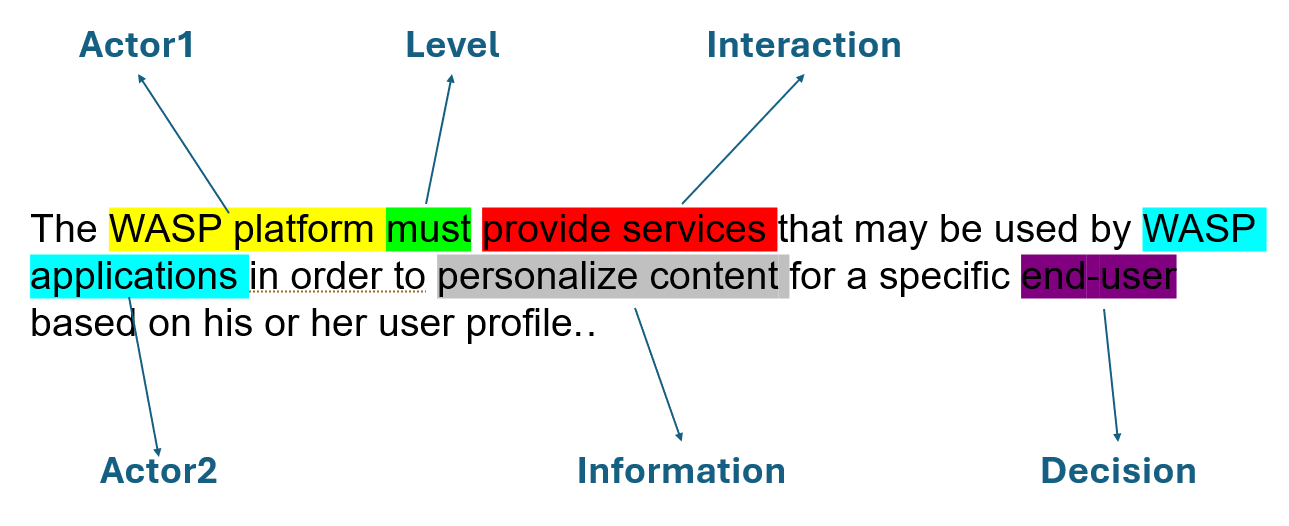
</div>


#### Aim:
The primary aim is to take each SRS statement and systematically create these nodes and edges to construct a comprehensive workflow graph. This step is essential as it forms the foundation for visualizing the software's functionality and interactions.

#### Process:
1. **Extracting Components Using LLMs:**
   - **Actor1 Identification:** The LLM is used to parse the SRS statement and identify the subject (Actor1) that initiates the action.
   - **Actor2 Identification:** The LLM then identifies the object (Actor2) that is affected by the action of Actor1.
   - **Interaction Extraction:** The LLM extracts the verb or action phrase that describes the interaction between Actor1 and Actor2.
   - **Information Extraction:** Any additional data or context related to the interaction is identified and extracted by the LLM.
   - **Decision Identification:** Finally, the LLM identifies any decision points or outcomes that extend from the interaction involving Actor2.

2. **Creating Nodes and Edges:**
   - **Nodes Creation:** Based on the extracted components, nodes are created for Actor1, Actor2, and Decision.
   - **Edges Creation:** Edges are created to represent the interactions and information flow between the nodes. The interaction edge connects Actor1 and Actor2, while the information edge provides additional context to the interaction.

3. **Constructing the Workflow Graph:**
   - Using the nodes and edges created from each SRS statement, a workflow graph is constructed. This graph visually represents the sequence of actions, interactions, and decisions, providing a clear and structured view of the software's functionality.

By automating this process with LLMs, we can efficiently and accurately transform textual SRS statements into detailed workflow graphs. This not only enhances the understanding of the software requirements but also aids in identifying potential issues, dependencies, and areas for improvement in the software design.

In [153]:
from openai import OpenAI
from IPython.display import Markdown

os.environ["OPENAI_API_KEY"]
model = "gpt-4o"

class OpenAIChatHelper:
    def __init__(self,expert, model=model, temp=0.2):
        self.expert = expert
        self.model = model
        self.temp = temp
        self.chat_history = [{'role':'system', 'content':self.expert}]

    def ask_question(self, user_input):
        # Append the user input to the chat history
        self.chat_history.append({"role": "user", "content": user_input})

        # Make the API request
        client = OpenAI()
        
        response = client.chat.completions.create(
            model=self.model,
            messages=self.chat_history,
            temperature = self.temp            
        )

        # Extract the assistant's response
        assistant_response = response.choices[0].message.content

        # Append the assistant's response to the chat history
        self.chat_history.append({"role": "assistant", "content": assistant_response})

        return assistant_response

    
def read_string_to_json(input_string):
    import json
    """
    A function to convert string output to json file
    The input must be string of a json format. 
    To validate output format.
    """
    if input_string is None:
        return None

    try:
        #input_string = input_string.replace("'", "/'")  # Replace single quotes with double quotes for valid JSON
        input_string = input_string.replace("```", "") 
        input_string = input_string.replace("json", "")   
        data = json.loads(input_string)
        return data
    except json.JSONDecodeError:
        print("Error: Invalid JSON string")
        return input_string 
    
    
def list_to_str(obj):
    """to convert list of string to string format. 
    to standardize values types.
    """
    
    if type(obj) == list:
        string = " ".join(obj)
        
    else:
        string = obj
        
    return string

def save_nodes(file_name, my_dict):
    """to save LLM output files with specified file name
    
    file_name: str any filename. model name will be added
    my_dict: dict the model output
    """
    
    path = "datasets\\with_nodes\\"

    df_with_nodes = pd.DataFrame(my_dict).applymap(list_to_str)
    
    df_with_nodes.to_csv(path + file_name +"_"+ model + ".csv")
    
    return f"{file_name} saved in {path}"

### Implementing the Workflow Automation with GPT-4

To achieve the task of automating the drawing of workflow processes from SRS statements, I utilized the HuggingFace transformers library initially. However, after experimenting with several open-source models and finding them inadequate for the specific requirements of this project, I opted to use the advanced GPT-4 model from OpenAI. Given the time constraints and the proof-of-concept nature of this work, GPT-4 provided a more reliable and efficient solution.

#### Implementation Steps:

1. **Using GPT-4 for Information Extraction:**
   - **Model Selection:** Due to the limitations of open-source models, GPT-4 was chosen for its advanced capabilities in natural language understanding and generation.
   - **API Integration:** The OpenAI API was integrated into the project to leverage GPT-4 for extracting the necessary components (Actor1, Actor2, Interaction, Information, Decision) from each SRS statement.

2. **Helper Functions:**
   - Several helper functions were constructed to streamline the process of running the LLM model, validating the outputs, and saving the results. These functions ensure that the workflow is efficient and the results are accurate.

3. **Running the Code:**
   - The following code snippet demonstrates how to run the process for any file in the dataset by providing an OpenAI API key. This code extracts the required information from each SRS statement and constructs the workflow graph.


#### Explanation of the Code:

1. **API Key Setup:**
   - The OpenAI API key is set to authenticate requests to the GPT-4 model.

2. **`OpenAIChatHelper` Object:**
   - This class sends a prompt to GPT-4 to extract the required components (Actor1, Actor2, Interaction, Information, Decision) from an SRS statement.
   - The response from GPT-4 is parsed to retrieve the extracted components.

3. **`read_string_to_json and list_to_str` Functions:**
   - These functions perform basic validation on the extracted output to ensure all necessary components are in JSON format.
   - The validation logic can be expanded based on specific requirements.

4. **`save_nodes` Function:**
   - This function saves the extracted and validated results to a local CSV file for further analysis and visualization.


By using GPT-4 and the helper functions, the process of extracting workflow components from SRS statements and constructing workflow graphs is automated efficiently. This approach demonstrates the feasibility of the concept and provides a solid foundation for further development and refinement.

In [154]:
file_name = "wasp.csv"
model= "gpt-4o"

df = pd.read_csv('datasets/'+file_name)

my_dict = {
    "Statement":[],
  "Actor1": [],
  "Actor2": [],
  "Interaction": [],
  "Information": [],
  "Decision": []
}

for statement in df.RequirementText:
    
    chat = OpenAIChatHelper(expert="you are a senior professional software developer", model = model)
    
    content = f"""Your task is to look at the single software requirement statement and extract the information as \
I described below.

## The statement:
```{statement}```

## Required output:
The output file MUST be a json with following keys and values as described.

Actor1:The subject in the statement that would take action. Use max 2 best descriptive words. Use only plural form of these words. Remove stop words.
Actor2: The object in the statement that would be affected from Actor1's action. Use max 2 best descriptive words. Use only plural form of these words. Remove stop words.
Interaction: The action taken by Actor1. This should be verbs only. Do not use use any unnecessary words or stop words. 
Information: if any information or data send or taken by any of the actor. Use max 3 best descriptive words.
Decision: if any any other object engage as in conclusion of the process put that object. Use max 3 best descriptive words and remove stop words.

## Current list of words:
Try to be consistent with wording and use same terms to describe same objects or subject. Here is the current \
dictionary with previous words for your reference.
{my_dict}


Evaluate statement and provide required output as a JSON. Do not put any other wording or description to your \
output. If you think some keys such as information of decision is not in the statement put null value for those keys.
You do not have to fill all keys be reliable.
"""
    
    response = chat.ask_question(content)
    response = read_string_to_json(response)
    
    my_dict["Statement"].append(statement)
    my_dict["Actor1"].append(response["Actor1"])
    my_dict["Actor2"].append(response["Actor2"])
    my_dict["Interaction"].append(response["Interaction"])
    my_dict["Information"].append(response["Information"])
    my_dict["Decision"].append(response["Decision"])
      

In [157]:
# get output into a dataframe
df_nodes = pd.DataFrame(my_dict)

df_nodes.head(3)

,Statement,Actor1,Actor2,Interaction,Information,Decision
0,There should be an application that provides f...,"[mobile, users]",[meetings],"[propose, schedule]",None,None
1,The WASP platform must provide services that m...,"[wasp, platforms]","[wasp, applications]",[personalize],"[content, user, profile]",None
2,The WASP platform should provide services that...,"[wasp, platforms]","[wasp, applications]",[personalize],"[content, user, profiles]",[end-users]


In [160]:
# need to pull strings from lists
df_nodes = df_nodes.applymap(list_to_str)

df_nodes.head(3)

,Statement,Actor1,Actor2,Interaction,Information,Decision
0,There should be an application that provides f...,mobile users,meetings,propose schedule,None,None
1,The WASP platform must provide services that m...,wasp platforms,wasp applications,personalize,content user profile,None
2,The WASP platform should provide services that...,wasp platforms,wasp applications,personalize,content user profiles,end-users


### Results Overview

After processing the SRS statements using GPT-4, the extracted components are structured into a tabular format. Each row corresponds to an SRS statement, with columns representing the extracted workflow components: `Actor1`, `Actor2`, `Interaction`, `Information`, and `Decision`. Below is an example of how the results look:

| index | Statement                                                                 | Actor1         | Actor2           | Interaction       | Information         | Decision  |
|-------|---------------------------------------------------------------------------|----------------|------------------|-------------------|---------------------|-----------|
| 0     | There should be an application that provides f...                         | mobile users   | meetings         | propose schedule  | None                | None      |
| 1     | The WASP platform must provide services that m...                         | wasp platforms | wasp applications| personalize       | content user profile| None      |
| 2     | The WASP platform should provide services that...                         | wasp platforms | wasp applications| personalize       | content user profiles| end-users |

### Explanation of the Results:

1. **Index:** This column is an identifier for each SRS statement, allowing easy reference and tracking.

2. **Statement:** This column contains the original SRS statement from which the workflow components were extracted.

3. **Actor1:** Represents the subject of the statement that initiates an action. For example, "mobile users" in the first statement.

4. **Actor2:** Represents the object affected by the action of Actor1. For example, "meetings" in the first statement.

5. **Interaction:** Describes the action taken by Actor1. For example, "propose schedule" in the first statement.

6. **Information:** Contains any additional data or context related to the interaction. For example, "content user profile" in the second statement.

7. **Decision:** Represents any decision points or outcomes that extend from the interaction involving Actor2. For example, "end-users" in the third statement.

### Summary:

The results table provides a clear and structured view of the extracted workflow components from each SRS statement. This structured data can be used to construct workflow graphs, visually representing the interactions and decisions within the software system. The table highlights the relationships between different actors, their interactions, and any associated information or decisions, making it easier to understand and analyze the software requirements.

By automating the extraction process using GPT-4 and organizing the results in this format, we demonstrate the feasibility of the approach and provide a solid foundation for further development and refinement. This proof-of-concept work shows that the methodology can effectively transform textual SRS statements into actionable workflow components, paving the way for more advanced and production-grade implementations in the future.

In [161]:
# Save file
save_nodes("wasp_gpt_4o", my_dict=my_dict)

'wasp_gpt_4o saved in datasets\\with_nodes\\'

### Visualizing Workflow Graphs

In this part of the project, the focus was on visualizing the extracted workflow components to provide a clear understanding of the software's functionality. To achieve this, I used the NetworkX library, which is well-suited for creating and visualizing complex networks and graphs.

#### Functions for Visualization:

1. **`workflow_springlayout()` Function:**
   - This function uses the spring layout algorithm provided by NetworkX to visualize the workflow graph.
   - The spring layout algorithm positions nodes using a force-directed layout, which attempts to position nodes such that all the edges are of more or less equal length and there are as few crossing edges as possible.
   - **Strengths:** This layout is useful for presenting more connections between nodes, giving a comprehensive view of the relationships and interactions within the software.
   - **Limitations:** While it shows more connections, it can become cluttered and less clear, especially for larger datasets, making it difficult to discern a clear workflow.

2. **`workflow_graph()` Function:**
   - This function provides a more straightforward visualization of the workflow graph, focusing on clarity and simplicity.
   - It is particularly effective for datasets with up to 20 connections, where it can clearly depict the interactions and decisions without becoming too messy.
   - **Strengths:** This layout is very handy for smaller datasets, providing a clear and concise view of the workflow.
   - **Limitations:** As the number of nodes and connections increases beyond 20, the graph can become cluttered and difficult to interpret, reducing its effectiveness.

#### Implementation and Visualization:

The following code snippets demonstrate how these functions are implemented and used to visualize the workflow graphs:

In [3]:
def workflow_springlayout(df, actor1:list = None, actor2:list = None, 
                          n_size:int = 100, n_font_size=10, statement=False):
    """To draw a graph with spring layout. 
    
    df: dataframe that contains nodes and edges with following columns names
        columns ['Statement', 'Actor1', 'Actor2', 'Interaction', 'Information', 'Decision']
    actor1: list of actor1 subset to visualise workflow.
    actor2: list of actore2 subset to visulise
    n_size: size of nodes 100, 200, ... 500... 1000
    n_font_size: font size of nodes.
    statement: True if you want to visualise SRS default False
    
    """
    # to draw selected subset workflow
    if (actor1 is not None):
        df = df.loc[(df.Actor1.isin(actor1))]
    
    if (actor2 is not None):
        df = df.loc[(df.Actor2.isin(actor2))]
    
    
    # print out the req statements
    if statement:
        title = "Software Requirement Specifications"

        print(title)
        print("_"*len(title))

        for i, text in enumerate(df["Statement"]):
            print(f"{i+1}. {text}")

    # Initialize directed graph
    G = nx.DiGraph()

    # Calculate node sizes based on their frequency in Actor1, Actor2, and Decision columns
    node_size_dict = df['Actor1'].value_counts().to_dict()
    node_size_dict.update(df['Actor2'].value_counts().to_dict())

    # If Decision column has non-None values, include them in the node size calculation
    if df['Decision'].notna().sum() > 0:
        decision_counts = df['Decision'].value_counts().to_dict()
        for node, count in decision_counts.items():
            if node in node_size_dict:
                node_size_dict[node] += count
            else:
                node_size_dict[node] = count

    # Add nodes and edges
    for _, row in df.iterrows():
        actor1 = row['Actor1']
        actor2 = row['Actor2']
        interaction = row['Interaction']
        decision = row['Decision']
        information = row['Information']

        # Skip rows with NaN values in Actor1 or Actor2
        if pd.isna(actor1) or pd.isna(actor2):
            continue

        # Add nodes
        G.add_node(actor1)
        G.add_node(actor2)

        # Add edge for interaction
        if information:
            edge_label = f"{interaction}, {information}"
        else:
            edge_label = interaction
        G.add_edge(actor1, actor2)

        # Add edge for decision if it exists and is not NaN
        if pd.notna(decision):
            G.add_node(decision)
            G.add_edge(actor2, decision)

    # Prepare node sizes for drawing
    node_sizes = [node_size_dict.get(node, 1) * n_size for node in G.nodes()]

    # Assign colors based on whether the node is in Actor1 or Actor2
    node_colors = []
    for node in G.nodes():
        if node in df['Actor1'].values:
            node_colors.append('skyblue')
        elif node in df['Actor2'].values:
            node_colors.append('lightgreen')
        else:
            node_colors.append('lightgrey')

    # Draw the graph
    pos = nx.spring_layout(G, k=0.5)  # You can use other layouts like shell_layout, circular_layout, etc.

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(12, 10))

    # Draw nodes and edges
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=n_font_size, font_weight="bold", arrows=True, ax=ax, arrowstyle='-|>', arrowsize=20)

    # Set the title
    ax.set_title('Workflow Graph')      

    plt.tight_layout()

    # Show the plot
    plt.show()

In [4]:
def workflow_graph(df, actor1:list = None, actor2:list = None, 
                   n_size=100, n_font_size=10, edge_font_size=8, statement=False):
    
    """To draw a graph with workflow layout. 
    
    df: dataframe that contains nodes and edges with following columns names
        columns ['Statement', 'Actor1', 'Actor2', 'Interaction', 'Information', 'Decision']
    actor1: list of actor1 subset to visualise workflow.
    actor2: list of actore2 subset to visulise
    n_size: size of nodes 100, 200, ... 500... 1000
    n_font_size: font size of nodes.
    statement: True if you want to visualise SRS default False
    
    """
    # to draw selected subset workflow
    if (actor1 is not None):
        df = df.loc[(df.Actor1.isin(actor1))]
    
    if (actor2 is not None):
        df = df.loc[(df.Actor2.isin(actor2))]
    
    # print out the req statements
    if statement:
        title = "Software Requirement Specifications"

        print(title)
        print("_"*len(title))

        for i, text in enumerate(df["Statement"]):
            print(f"{i+1}. {text}")

    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes and edges
    for index, row in df.iterrows():
        actor1 = row['Actor1']
        actor2 = row['Actor2']
        interaction = row['Interaction']
        information = row['Information']
        decision = row['Decision']

        # Add nodes
        G.add_node(actor1, node_type='Actor1')
        G.add_node(actor2, node_type='Actor2')

        # Add edge for interaction
        if information is None:
            edge_label = interaction
        else:
            edge_label = f"{interaction} ({information})"

        G.add_edge(actor1, actor2, label=edge_label)

        # Add edge for decision if it not nan
        if pd.notna(decision):
            G.add_node(decision)
            G.add_edge(actor2, decision)

    # Node sizes based on their frequency in Actor1 and Actor2 columns
    node_sizes = {node: (df['Actor1'].tolist() + df['Actor2'].tolist()).count(node) * n_size for node in G.nodes()}

    # Assign colors based on node type
    node_colors = []
    for node in G.nodes(data=True):
        if node[1]['node_type'] == 'Actor1':
            node_colors.append('skyblue')
        elif node[1]['node_type'] == 'Actor2':
            node_colors.append('lightgreen')
        elif node[1]['node_type'] == 'Decision':
            node_colors.append('lightcoral')

    # Draw the graph using Graphviz layout
    pos = graphviz_layout(G, prog='dot')
    plt.figure(figsize=(12, 8))

    # Draw nodes with sizes and colors
    nx.draw_networkx_nodes(G, pos, node_size=[node_sizes[node] for node in G.nodes()], node_color=node_colors)

    # Draw edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=n_font_size, font_family='sans-serif')

    # Draw edge labels
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=edge_font_size)

    plt.title('Workflow Graph')
    plt.axis('off')
    
    plt.show()

#### Explanation of the Code:

1. **Creating the Graph:**
   - Both functions create a directed graph (`DiGraph`) using NetworkX.
   - Nodes and edges are added to the graph based on the extracted workflow components from the dataframe.

2. **Spring Layout Visualization (`workflow_springlayout`):**
   - The spring layout algorithm is used to position the nodes.
   - The graph is drawn with nodes, edges, and edge labels, providing a comprehensive view of the interactions.
   - This layout is useful for visualizing more connections but can become cluttered for larger datasets.

3. **Simple Layout Visualization (`workflow_graph`):**
   - A simpler circular layout is used to position the nodes.
   - This layout is effective for smaller datasets, providing a clear and concise view of the workflow.
   - As the number of nodes and connections increases, the graph can become cluttered.

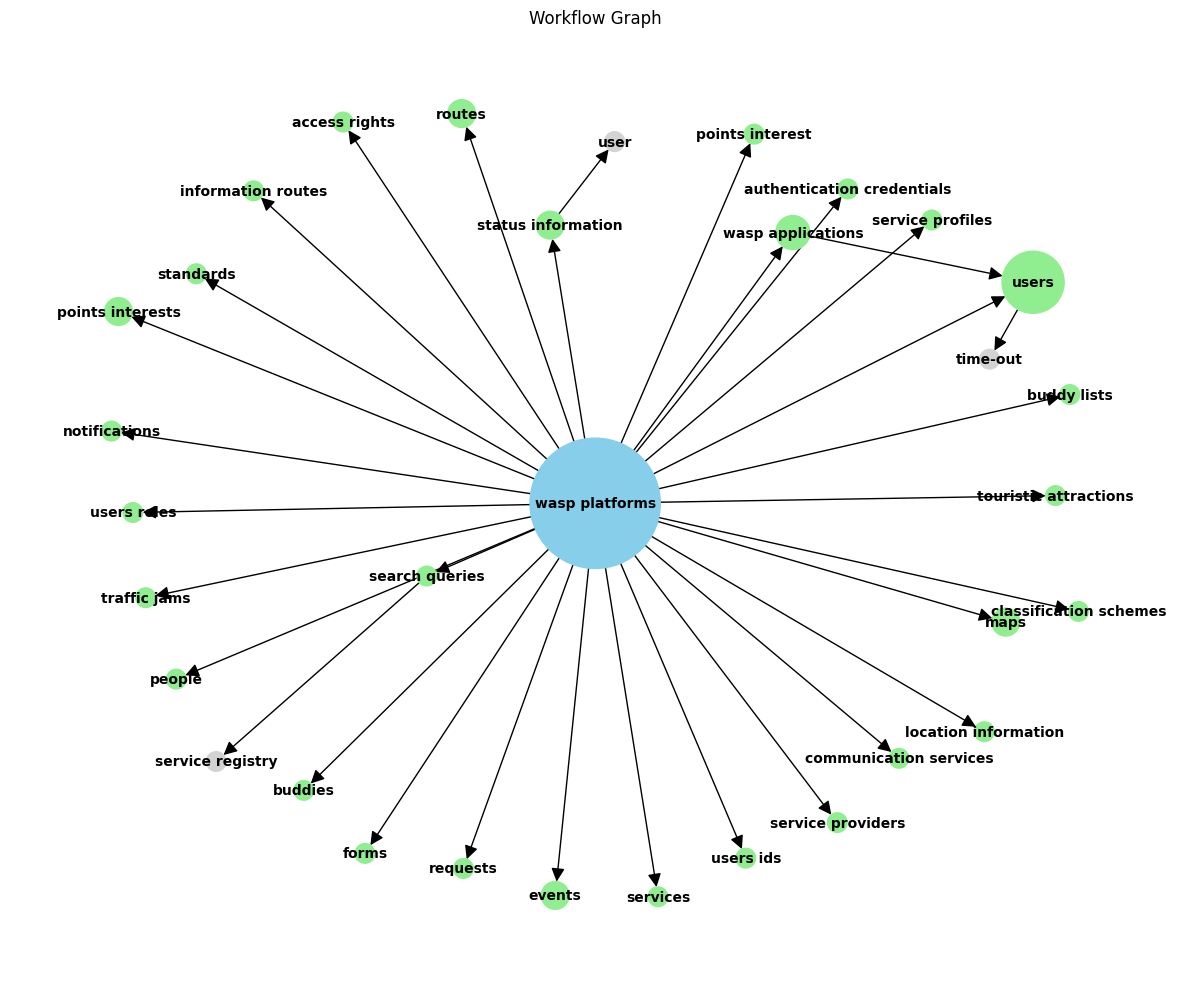

In [5]:
# the dataset with nodes and edges
wasp_nodes_4o = pd.read_csv("datasets\with_nodes\wasp_gpt_4o.csv")

# draw a graph of "wasp platform" and its connections
workflow_springlayout(df = wasp_nodes_4o, actor1=["wasp platforms"],  n_size=200, n_font_size=10, statement=False)

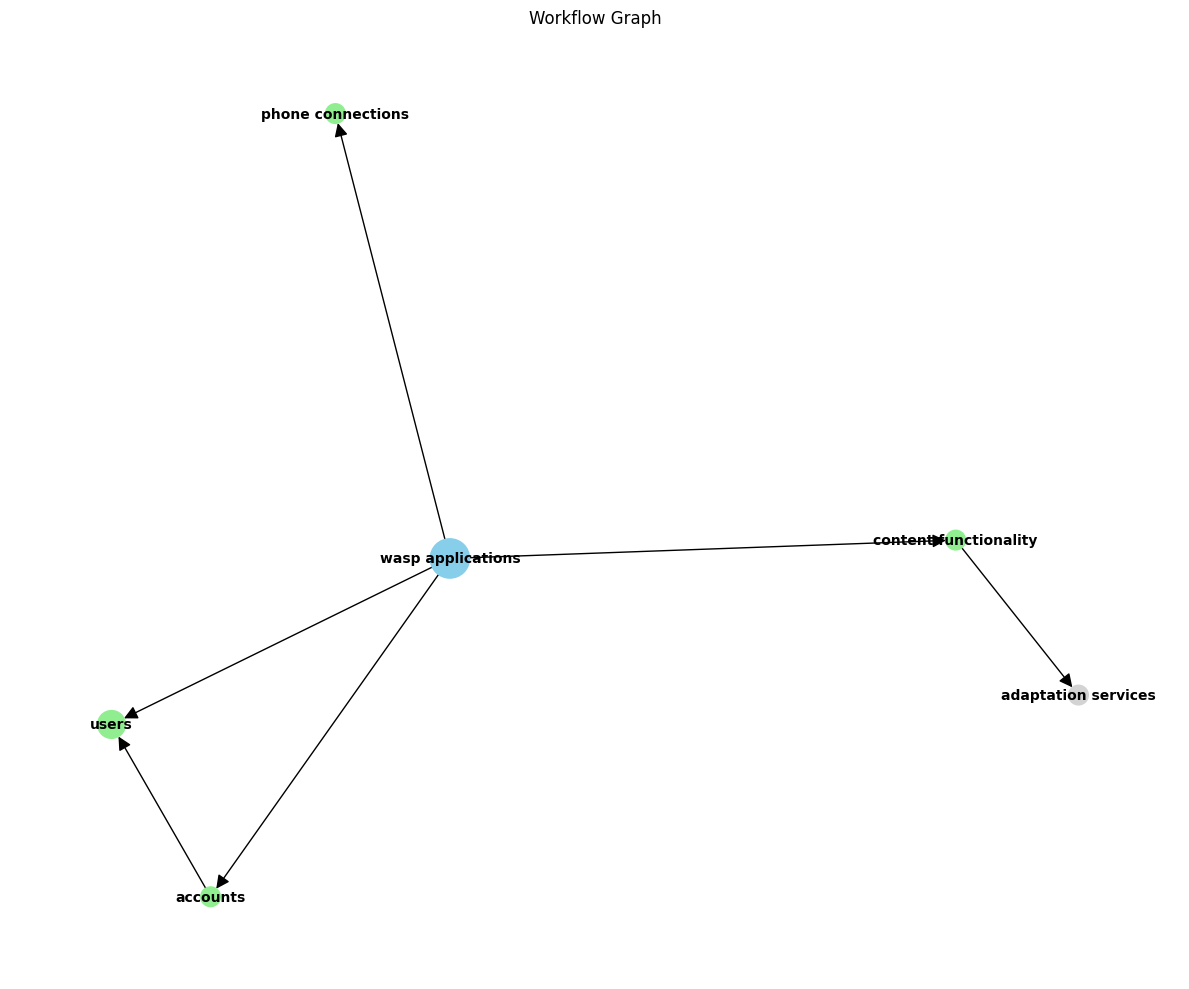

In [6]:
# a graph of subset
workflow_springlayout(df = wasp_nodes_4o, actor1=["wasp applications"],  n_size=200, n_font_size=10, statement=False)

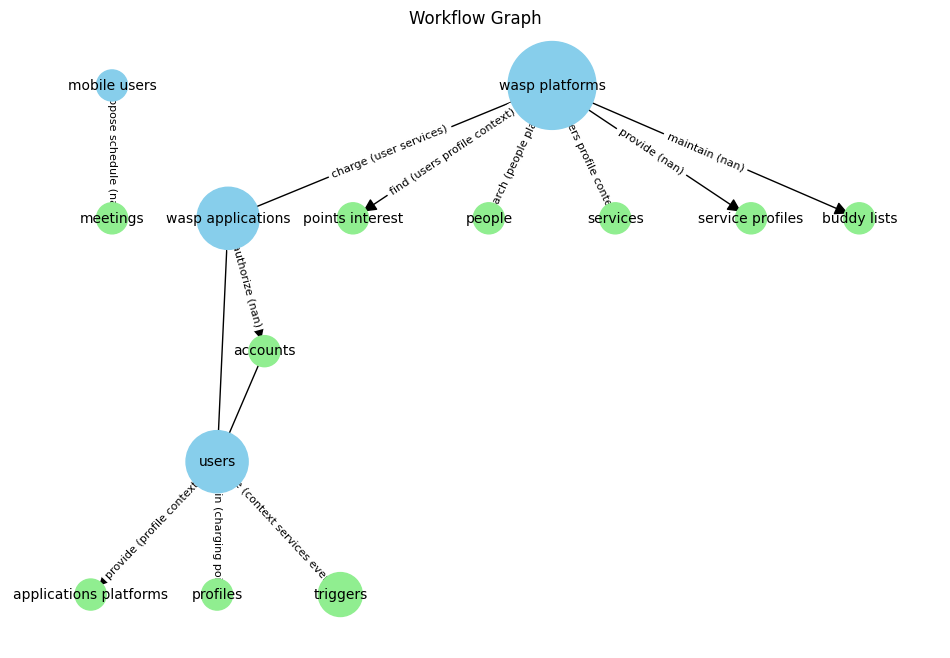

In [91]:
# workflow grah with edge text added
workflow_graph(df = wasp_nodes_4o.loc[:13], n_size=500, statement=False)

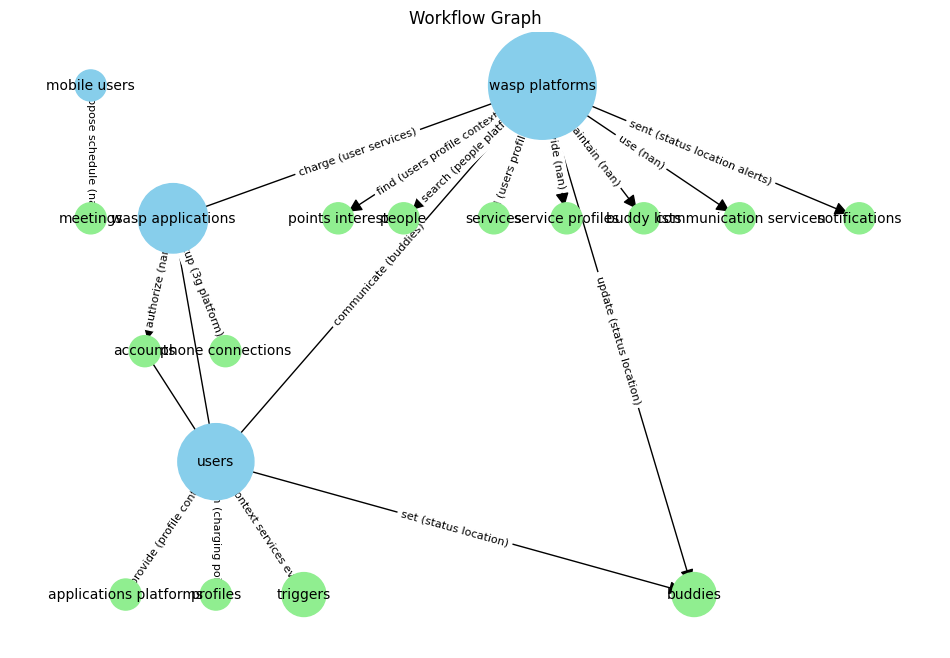

In [9]:
# when number of nodes increase the graph get complicated
workflow_graph(df = wasp_nodes_4o.loc[:19], n_size=500, statement=False)

### Summary:

The visualization of workflow graphs using NetworkX demonstrates the feasibility of the concept. The `workflow_springlayout` function provides a comprehensive view of the interactions, while the `workflow_graph` function offers a clearer view for smaller datasets. Both functions have their strengths and limitations, highlighting the need for further refinement and better infrastructure for production-grade implementations.

This proof-of-concept work successfully shows that the approach can transform textual SRS statements into meaningful workflow graphs, providing valuable insights into the software's functionality and interactions.

---

# Part 3: Evaluation

To evaluate the performance of the LLM in extracting workflow components from SRS statements, I created a ground truth dataset by manually classifying each statement. This ground truth dataset serves as a benchmark to assess the accuracy of the LLM-generated labels. The evaluation process involves comparing the LLM-generated labels with the ground truth labels for each node and edge column in the dataset.

#### Evaluation Process:

1. **Ground Truth Dataset:**
   - A manually classified dataset was created, containing the same columns as the LLM-generated dataset (`Actor1`, `Actor2`, `Interaction`, `Information`, `Decision`).
   - This dataset serves as the reference for evaluating the LLM's performance.

2. **Evaluation Function:**
   - The `evaluation_scores()` function was developed to compare the LLM-generated labels with the ground truth labels.
   - The function calculates evaluation metrics such as accuracy, precision, recall, and F1-score for each node and edge column.

3. **Running the Evaluation:**
   - The evaluation process is run for each node and edge column in the dataset, providing a comprehensive assessment of the LLM's performance.

#### Implementation:

The following code snippet demonstrates the implementation of the `evaluation_scores()` function and the evaluation process:

In [2]:
node_cols = ['Actor1', 'Interaction', 'Information', 'Actor2', 'Decision']

In [3]:
llm_nodes = pd.read_csv("datasets\with_nodes\wasp_gpt_4o.csv")[node_cols]

In [4]:
gt_nodes = pd.read_csv("datasets\with_nodes\wasp_human_nodes.csv")[node_cols]

In [5]:
# Function to check if there is at least one common word
def has_common_word(row):
    set1 = set(row['ground_truth_labels'].split())
    set2 = set(row['llm_labels'].split())
    return not set1.isdisjoint(set2)

In [94]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix


def evaluation_scores(df_groud_truth, df_llm):
    
    score_dict = {"Node_Edge":[],
              "recall":[],
             "num_matched":[],
             "num_missed":[],
             "accuracy":[],
             "precision":[],
             "f1":[]}
    
    for col in df_groud_truth.columns:
    
        df = pd.DataFrame({"ground_truth_labels":list(df_groud_truth[col]),
                           "llm_labels":list(df_llm[col])}).fillna(" ")

        # Apply the function to each row and create a new column with the result
        df['has_common_word'] = df.apply(has_common_word, axis=1)

        # Calculate precision, recall, and F1 score
        y_true = [1] * len(df)  # Since Actor1_gt holds the actual values, we assume all are true positives
        y_pred = df['has_common_word'].astype(int).tolist()


        score_dict["Node_Edge"].append(col)
        score_dict["recall"].append(recall_score(y_true, y_pred, average='binary'))
        score_dict["num_matched"].append(sum(y_pred))
        score_dict["num_missed"].append(len(y_pred) - sum(y_pred))
        score_dict["accuracy"].append(accuracy_score(y_true, y_pred))
        score_dict["precision"].append(precision_score(y_true, y_pred, average='binary'))
        score_dict["f1"].append(f1_score(y_true, y_pred))
    
    return pd.DataFrame(score_dict)

evaluation_scores(gt_nodes, llm_nodes)


,Node_Edge,recall,num_matched,num_missed,accuracy,precision,f1
0,Actor1,0.850746,57,10,0.850746,1.0,0.919355
1,Interaction,0.761194,51,16,0.761194,1.0,0.864407
2,Information,0.402985,27,40,0.402985,1.0,0.574468
3,Actor2,0.253731,17,50,0.253731,1.0,0.404762
4,Decision,0.014925,1,66,0.014925,1.0,0.029412


### Evaluation Results and Interpretation

Given the evaluation results and the nature of your ground truth data, it's important to focus on the metrics that provide meaningful insights. As you correctly pointed out, the precision and F1 scores are not informative in this context due to the nature of your ground truth data containing only true values. Similarly, the accuracy score is misleading because it includes True Negatives (TN) and False Positives (FP) in its calculation, which are not relevant here.

Therefore, the most meaningful metrics for your evaluation are the recall score and the number of matched and missed labels. These metrics directly reflect the LLM's ability to correctly identify the workflow components.

#### Evaluation Results:

| Node_Edge   | Recall   | Num_Matched | Num_Missed | Accuracy  | Precision | F1       |
|-------------|----------|-------------|------------|-----------|-----------|----------|
| Actor1      | 0.850746 | 57          | 10         | 0.850746  | 1.0       | 0.919355 |
| Interaction | 0.761194 | 51          | 16         | 0.761194  | 1.0       | 0.864407 |
| Information | 0.402985 | 27          | 40         | 0.402985  | 1.0       | 0.574468 |
| Actor2      | 0.253731 | 17          | 50         | 0.253731  | 1.0       | 0.404762 |
| Decision    | 0.014925 | 1           | 66         | 0.014925  | 1.0       | 0.029412 |

---
<div>
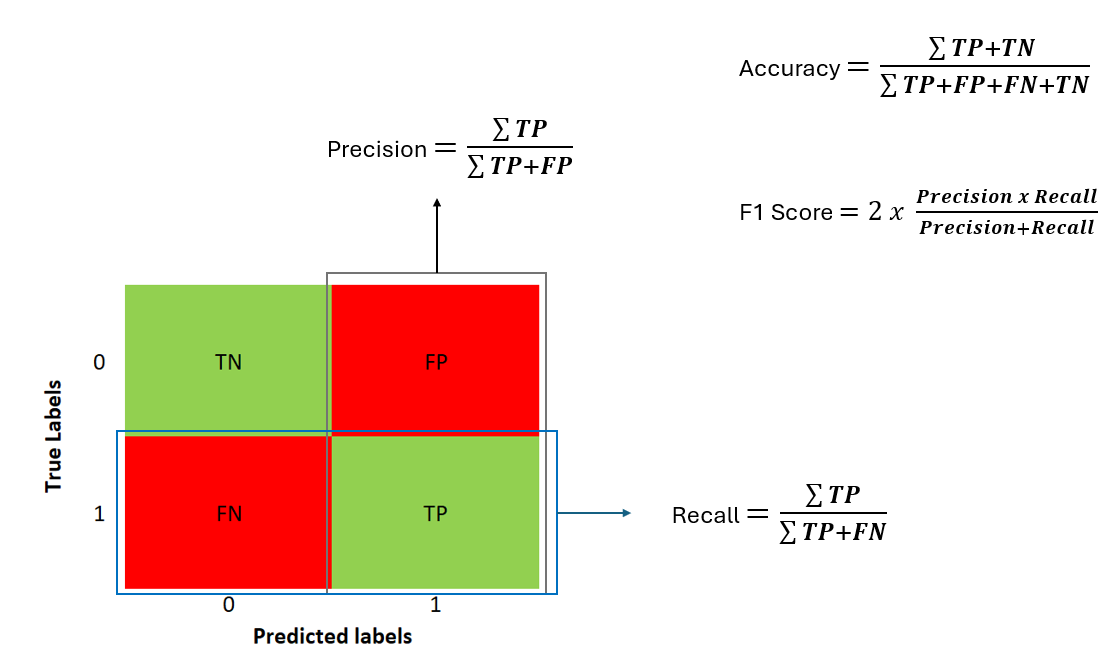
</div>



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels=None, title='Confusion Matrix'):
    """
    Plots a confusion matrix using seaborn heatmap and includes evaluation metrics.

    Parameters:
    y_true (list or array): True labels
    y_pred (list or array): Predicted labels
    labels (list): List of labels to index the matrix. This may be used to reorder or select a subset of labels.
    title (str): Title for the plot
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    # Calculate evaluation metrics
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    accuracy = accuracy_score(y_true, y_pred)
    
    # Create a DataFrame for the confusion matrix
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    # Plot the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
    
    # Add metrics to the plot
    plt.title(f'{title}\nPrecision: {precision:.2f}, Recall: {recall:.2f}, Accuracy: {accuracy:.2f}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    
    # Show the plot
    plt.show()

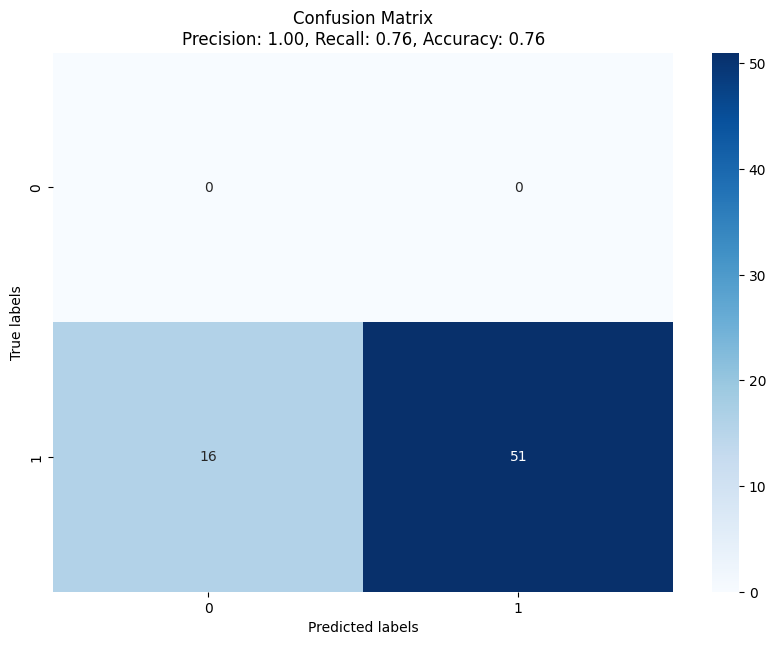

In [23]:
plot_confusion_matrix(y_true=y_true, y_pred=y_pred)

Given the evaluation results and the nature of the data, it is reasonable to focus on the most informative components: `Actor1`, `Interaction`, and `Actor2`. The `Decision` node and `Information` edge can be ignored in this evaluation due to the high number of null values, which makes their comparison less valuable.

#### Interpretation:

1. **Actor1:**
   - **Recall:** 0.850746
   - **Num_Matched:** 57
   - **Num_Missed:** 10
   - **Interpretation:** The LLM performed well in identifying `Actor1`, with a high recall score of approximately 85%. This indicates that the majority of `Actor1` labels were correctly identified, demonstrating strong performance in this area.

2. **Interaction:**
   - **Recall:** 0.761194
   - **Num_Matched:** 51
   - **Num_Missed:** 16
   - **Interpretation:** The LLM also performed reasonably well in identifying `Interaction`, with a recall score of approximately 76%. This suggests that most interactions were correctly extracted, although there is room for improvement.

3. **Actor2:**
   - **Recall:** 0.253731
   - **Num_Matched:** 17
   - **Num_Missed:** 50
   - **Interpretation:** The LLM's performance in identifying `Actor2` is relatively low, with a recall score of approximately 25%. This suggests that the majority of `Actor2` labels were missed, indicating a need for substantial improvement in this area.

### Summary:

By focusing on the key components (`Actor1`, `Interaction`, and `Actor2`), we obtain a clearer and more meaningful assessment of the LLM's performance. The results indicate that while the LLM performs well in identifying `Actor1` and reasonably well in identifying `Interaction`, it struggles with identifying `Actor2`.

#### Recommendations for Improvement:

1. **Actor1:** The high recall score indicates strong performance, but further fine-tuning and additional training data could help achieve even higher accuracy.

2. **Interaction:** The LLM performs reasonably well, but there is room for improvement. Enhancing the training data with more diverse examples of interactions could help improve recall.

3. **Actor2:**  The low recall score suggests that the LLM has difficulty identifying `Actor2`. This could be addressed by:
     - Providing more annotated examples of `Actor2` in the training data.
     - Refining the model's understanding of the context in which `Actor2` appears.
     - Implementing additional preprocessing steps to better highlight `Actor2` in the SRS statements.

By focusing on these key areas, we can make targeted improvements to the LLM's performance, ultimately enhancing its ability to accurately extract workflow components from SRS statements. This focused evaluation provides a solid foundation for further development and optimization, ensuring that the proof-of-concept work is both rigorous and informative.

---

# Bonus Task: Smart Evaluation and Multimodal Input Suggestions

To implement advanced evaluation techniques and provide suggestions for further improvements, we need to address several key points based on the current implementation and its limitations. Below, I explain each point in detail to fulfill the final task requirements.

#### 1. Lack of Domain Knowledge Results in Inadequate Ground Truth Data

**Challenge:**
- Finding corresponding node and edge data points for the dataset was challenging due to the lack of available resources.
- As a result, I manually classified the data to create a ground truth reference. While this is acceptable for a proof-of-concept, it is not ideal for a production-level solution.
- The lack of domain knowledge can significantly impact the quality of the ground truth data, leading to suboptimal results.

**Suggestion:**
- Collaborate with domain experts to create a more accurate and reliable ground truth dataset. Professionals with domain knowledge can provide precise labels, ensuring the ground truth data is of high quality.
- This collaboration will help mitigate the impact of inadequate domain knowledge and improve the overall accuracy of the evaluation.

#### 2. Fine-Tuning an LLM for the Task

**Challenge:**
- The current implementation uses a general-purpose LLM, which may not be optimized for extracting nodes and edges from SRS statements.
- SRS statements are typically structured in a specific way, and a general LLM may not capture these nuances effectively.

**Suggestion:**
- Fine-tune an LLM specifically for this task using a dataset of 200-300 correctly labeled SRS statements provided by professionals.
- Fine-tuning the model on domain-specific data will significantly enhance its ability to extract nodes and edges accurately.
- This targeted approach will improve the model's performance and ensure it is better suited for the task at hand.

#### 3. Multimodal Input for Enhanced Understanding

**Challenge:**
- The current implementation relies solely on textual input, which may limit the model's understanding of the task.
- Incorporating visual information, such as corresponding workflow graphs, can provide additional context and improve the model's performance.

**Suggestion:**
- Utilize multimodal capabilities by feeding the LLM with both SRS data and corresponding workflow graphs.
- This approach will enable the model to capture the task visually and verbally, leading to a more comprehensive understanding.
- Multimodal input can significantly enhance the model's ability to generate accurate workflow components and improve overall performance.

#### 4. Interactive Visualization Infrastructure

**Challenge:**
- The current implementation uses NetworkX for graph visualization, which is sufficient for a proof-of-concept but may not be ideal for production-level work.
- More interactive and user-friendly visualization tools can improve the quality and usability of the workflow graphs.

**Suggestion:**
- Explore more advanced and interactive visualization infrastructures, such as D3.js, Plotly, or Cytoscape.
- These tools offer enhanced interactivity and better user experiences, making it easier to analyze and interpret the workflow graphs.
- Implementing a more robust visualization infrastructure will improve the quality of the work and make it more accessible to end-users.

### Advanced Evaluation Techniques

To further enhance the evaluation process, we can implement advanced techniques such as semantic similarity and error analysis.

#### Semantic Similarity

**Implementation:**
- Use semantic similarity measures to compare the generated workflow steps with the ground truth.
- Tools like BERT embeddings or cosine similarity can be used to quantify the similarity between the generated and ground truth labels.

### Summary

By addressing the challenges and implementing the suggested improvements, we can significantly enhance the evaluation process and the overall quality of the workflow extraction task. Collaborating with domain experts, fine-tuning the LLM, utilizing multimodal input, and adopting advanced visualization tools will lead to more accurate and reliable results. Additionally, incorporating semantic similarity measures and performing thorough error analysis will provide deeper insights into the model's performance and guide further refinements.
